# BIOS512 Assignment #4

Import the 📈Tidyverse into your `R` session

In [26]:
library('tidyverse')

In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [14]:
vaccine_rate = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv",
    col_types = cols()
)

vaccine_rate |> print()

# A tibble: 66,113 × 16
   index state   year    name   type  city  county district enroll   mmr overall
   <dbl> <chr>   <chr>   <chr>  <chr> <chr> <chr>  <lgl>     <dbl> <dbl>   <dbl>
 1     1 Arizona 2018-19 A J M… Publ… Noga… Santa… NA           51   100      -1
 2     2 Arizona 2018-19 Acade… Char… Tucs… Pima   NA           22   100      -1
 3     3 Arizona 2018-19 Acade… Char… Tucs… Pima   NA           85   100      -1
 4     4 Arizona 2018-19 Acade… Char… Phoe… Maric… NA           60   100      -1
 5     5 Arizona 2018-19 Accla… Char… Phoe… Maric… NA           43   100      -1
 6     6 Arizona 2018-19 Alfre… Publ… Phoe… Maric… NA           36   100      -1
 7     7 Arizona 2018-19 All A… Char… Phoe… Maric… NA           24   100      -1
 8     8 Arizona 2018-19 Ameri… Char… Yuma  Yuma   NA           22   100      -1
 9     9 Arizona 2018-19 Arizo… Priv… Phoe… Maric… NA           26   100      -1
10    10 Arizona 2018-19 Arizo… Publ… San … Yuma   NA           78   100      -1
# … 

The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fraction of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [22]:
df_vacc_rates = vaccine_rate |>
        filter(mmr >= 0) |>
        group_by(state) |> 
        summarize(mmr_frt = (sum(mmr >= 95, na.rm = TRUE)/n()) 
)

Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [27]:
df_vacc_rates |> head()

state,mmr_frt
<chr>,<dbl>
Arizona,0.506404782
Arkansas,0.003527337
California,0.888506151
Colorado,0.623092236
Connecticut,0.811544992
Illinois,0.896825397


Arkansas has the smallest fraction of schools above the CDC target vaccination rate of 95%.

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [32]:
vax = vaccine_rate |> #creating our new datastep from previous one
    filter(state == "North Carolina") |> #have to put == when filtering because it is equal sign for R
    arrange(overall) |>
    mutate(per_of_schools = row_number() / n()) #mutate allows for data manipulation

vax |> head () #our new datastep

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,per_of_schools
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1767,North Carolina,2018-19,Renaissance Montessori Sch. of Cary,NA,NA,Wake,NA,4,-1,-1.0,NA,NA,NA,35.76823,-78.74369,0.0004796163
1766,North Carolina,2018-19,Annunciation Catholic,NA,NA,Craven,NA,23,-1,21.7,NA,NA,NA,34.87682,-76.90448,0.0009592326
1765,North Carolina,2018-19,Starmount Acad of Excellence,NA,NA,Mecklenburg,NA,77,-1,40.3,NA,NA,NA,35.13929,-80.87051,0.0014388489
1764,North Carolina,2018-19,Spruce Pine Montessori,NA,NA,Mitchell,NA,7,-1,42.9,NA,NA,NA,35.91674,-82.06719,0.0019184652
1763,North Carolina,2018-19,Moyock Elementary,NA,NA,Currituck,NA,85,-1,43.5,NA,NA,NA,36.52490,-76.17366,0.0023980815
1762,North Carolina,2018-19,Liberty Christian,NA,NA,Durham,NA,20,-1,45.0,NA,5,NA,36.06362,-78.92544,0.0028776978


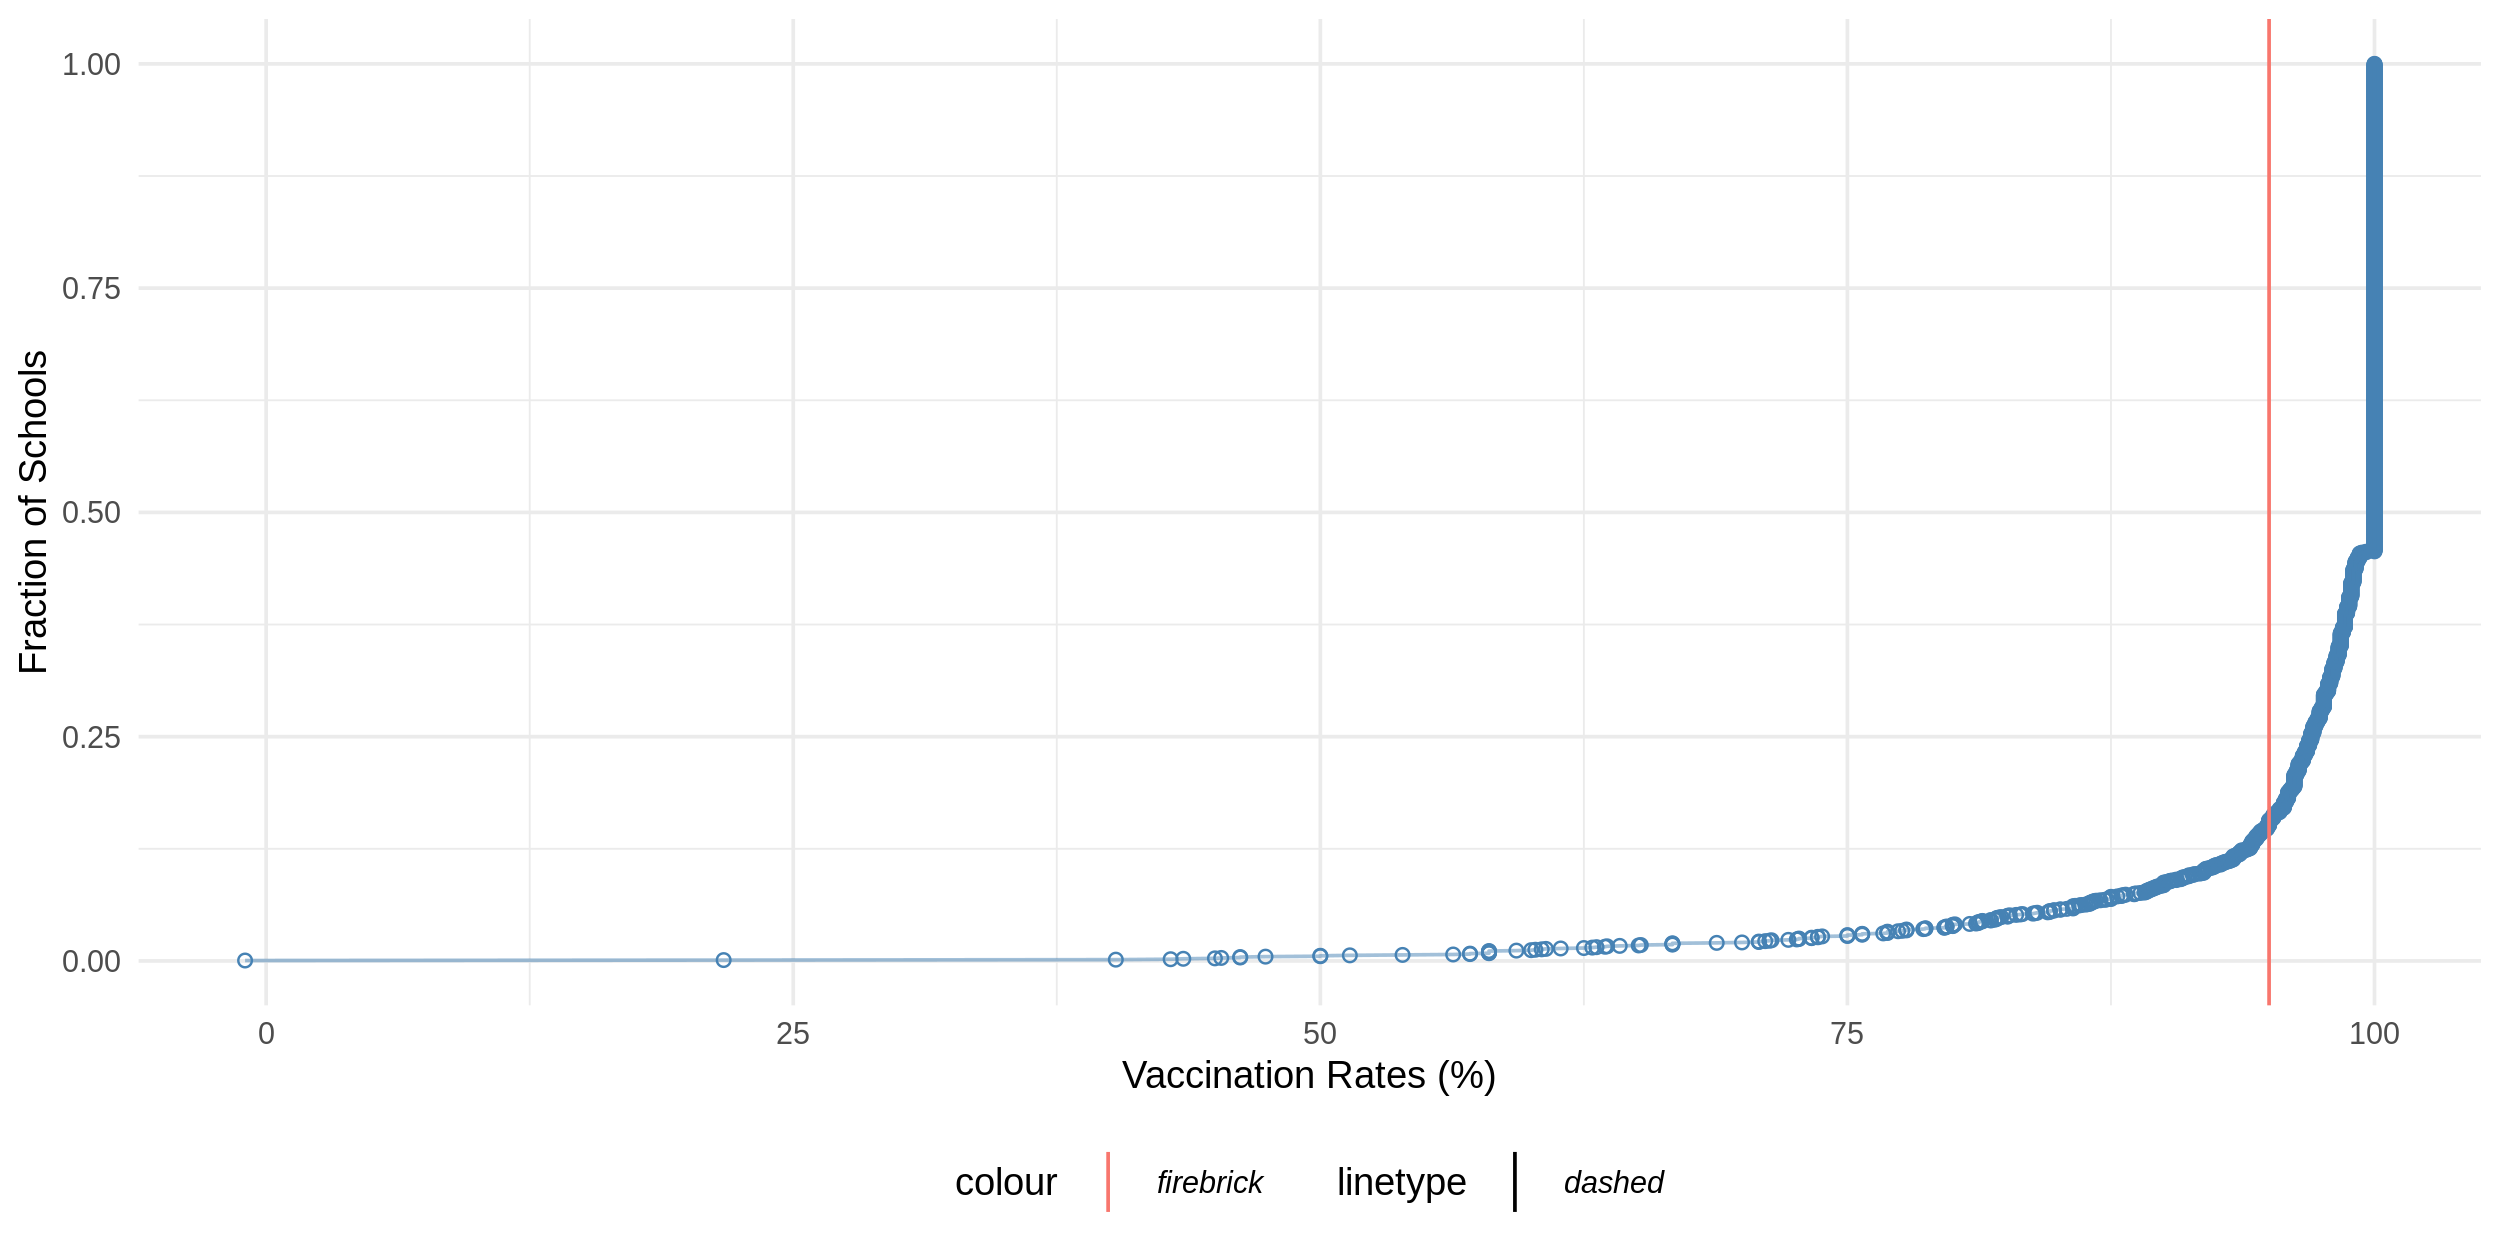

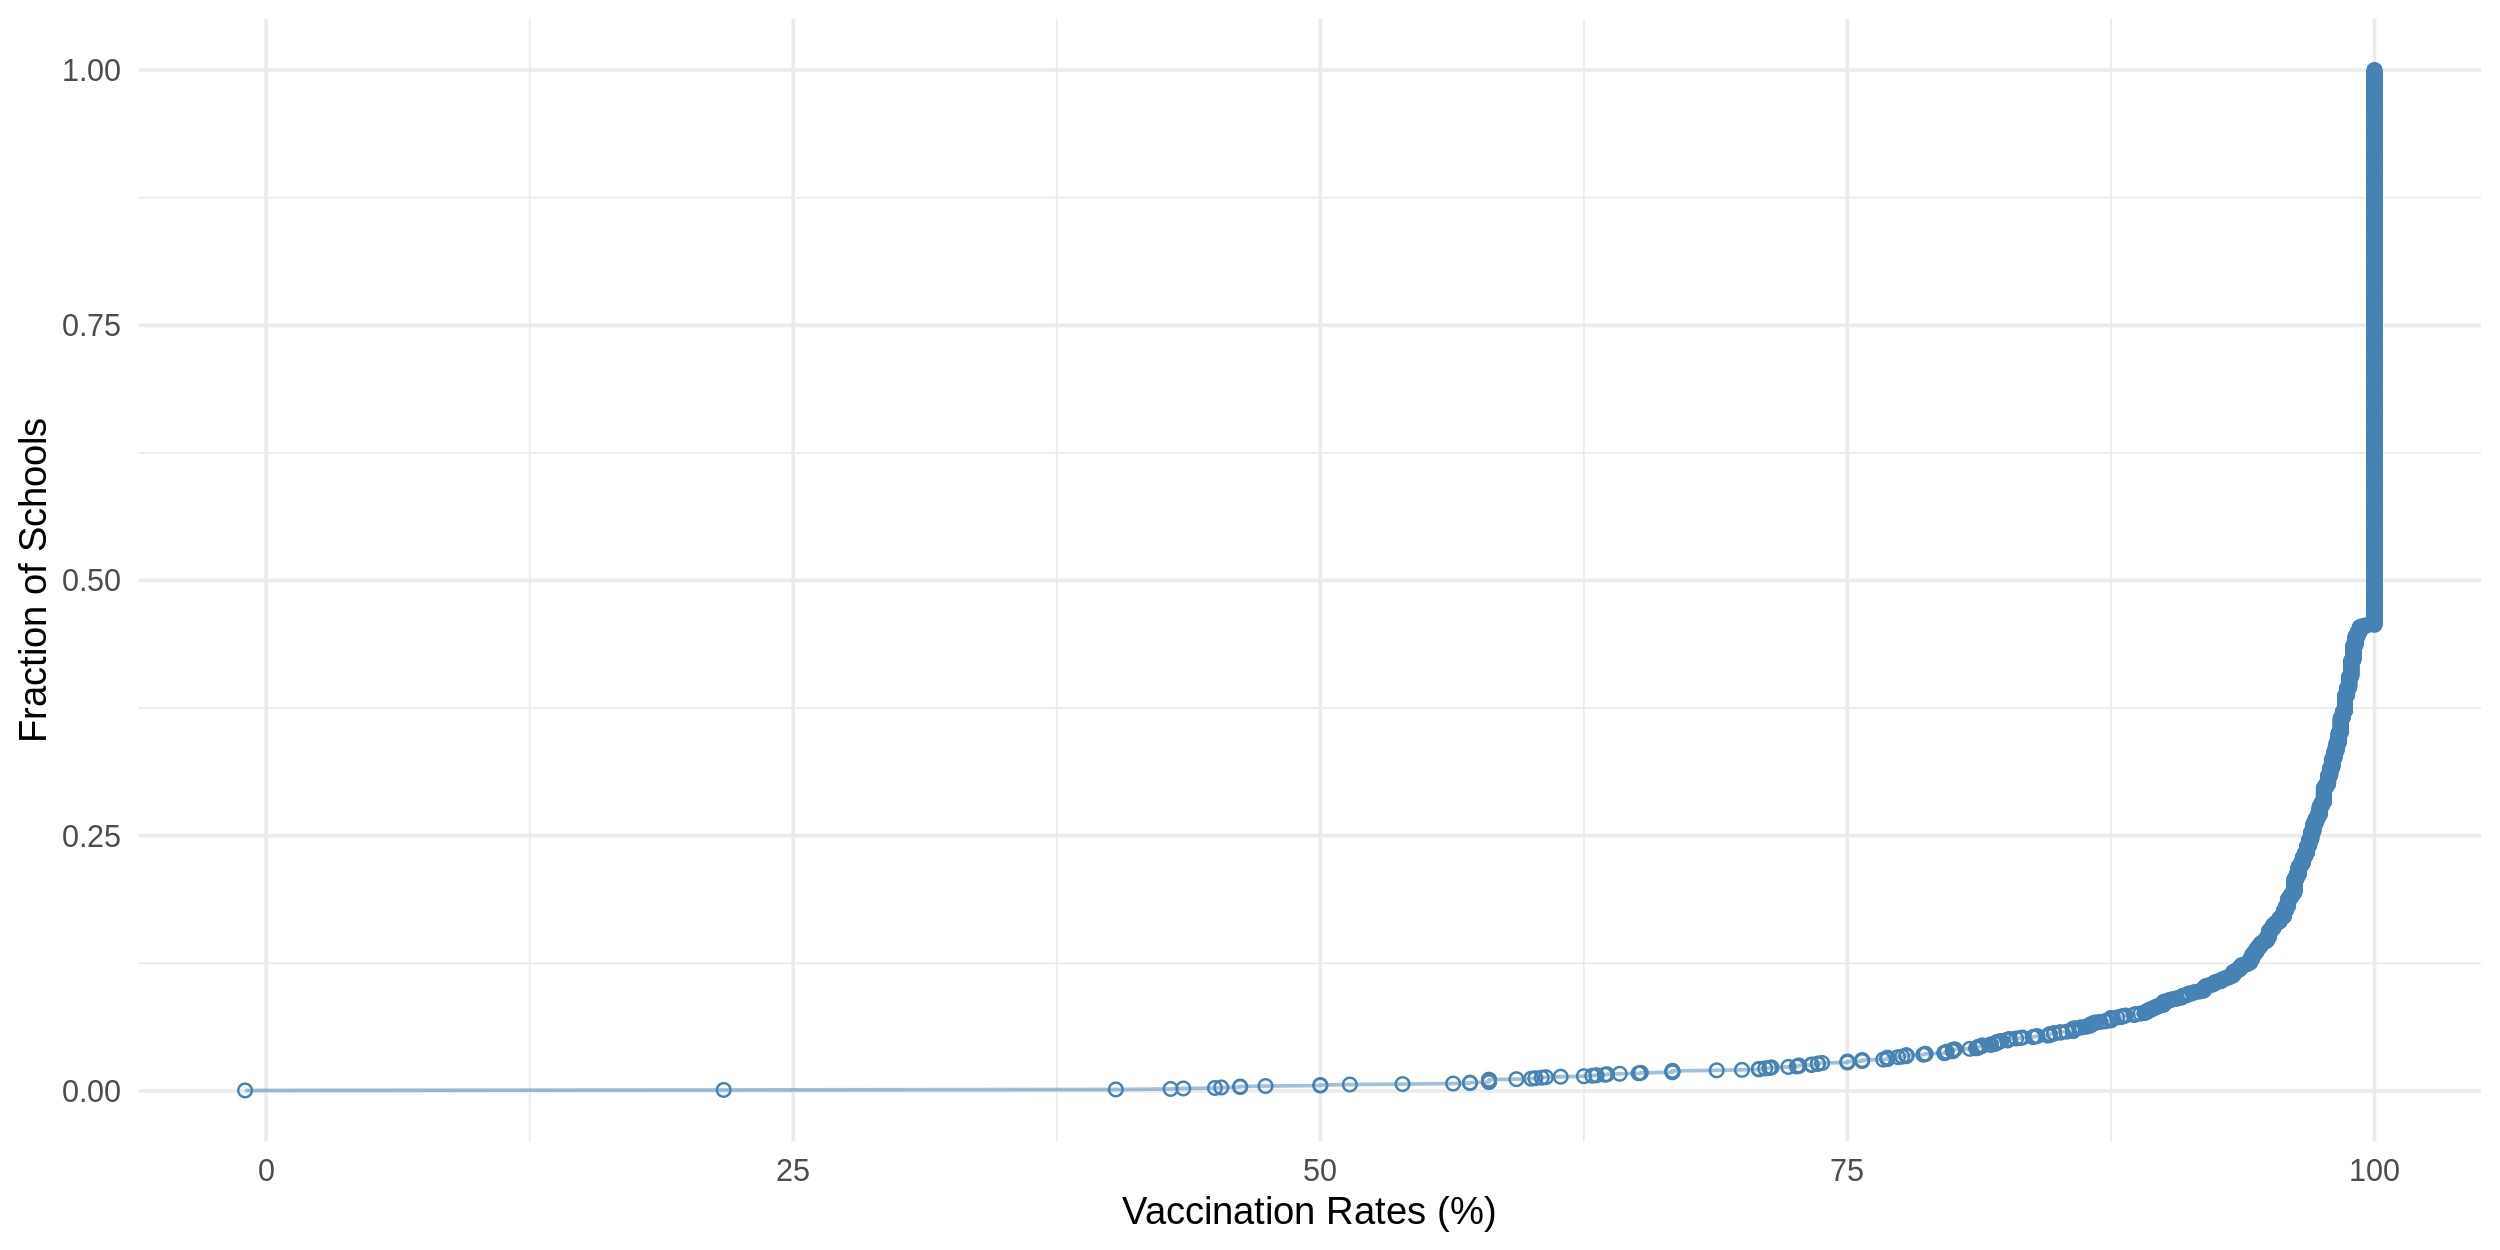

In [49]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 250)

p = ggplot(vax, aes(x = overall, y = per_of_schools)) + geom_point(color = "steelblue", shape = 21) +
    geom_line(color = "steelblue", alpha = 0.5) + 
    labs(y = "Fraction of Schools", x = "Vaccination Rates (%)") + theme_minimal() +
    theme (legend.position = 'bottom', legend.text = element_text(face = 'italic'))

p + geom_vline(aes(xintercept = 95, color = "firebrick", linetype = 'dashed')) #creating our indication point

p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

In [48]:
![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:2: unexpected '['
1: ![
     ^


Is the median vaccination rate for NC schools above the CDC recommended target?

The answer is yes.